# Adversarial attacks on Semantic Segmentation model.
This notebooks will go through the main methods implemented in the scripts, we will choose to either train or load a model and then run the 3 adversarial attacks that were implemented on some of the test images. 
We will visualize the results in each case.
Enjoy!

## 0. Importing dependencies

In [20]:
from fcn8 import CNN
import matplotlib.pyplot as plt
import scipy.misc
import numpy as np
import os.path

%matplotlib inline

## 1. Training and Loading a model.

In order to train the model from scratch.
We begin by initializing a CNN class, then the model is trained then saved using the run function.

In [25]:
epochs = 60
batch_size=16
n_classes=2
dropout_coeff = 0.75

image_shape=(160, 576)

model_dir = './model1'
weights_meta_dir = './model1/weights.meta'
output_dir = './data/test/output'

In [22]:
cnn = CNN(epochs, batch_size, n_classes, dropout_coeff, image_shape)

to train the model from scratch:

In [ ]:
cnn.run()

to load a pre-trained frozen-graph with the associated weights:

In [28]:
cnn.load_model(model_dir, weights_meta_dir)

## 2. Runnning a prediction

In [26]:
image_dir = "./data/test/input/umm_000075.png" 
output_img_filename = 'output_adversary.png'

prediction_image = cnn.predict(image_dir, image_shape, output_dir, output_img_filename)

TypeError: predict() missing 1 required positional argument: 'output_dir'

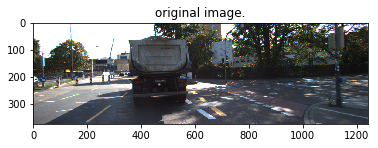

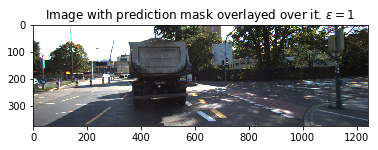

In [12]:
img = scipy.misc.imread(image_dir)
plt.figure()
plt.imshow(img)
plt.title("Original image.")

plt.figure()
plt.imshow(prediction_image)
plt.title("Image with prediction mask overlayed over it.")

plt.show()

## 3. Generating an adversarial example from an input image
### a. Using FGSM:

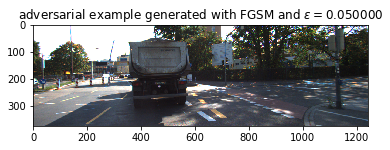

In [16]:
fgsm_img_filename = 'adv_img_fgsm.png'
epsilon = 0.05
adv_image = cnn.gen_adv(image_dir, image_shape, output_dir,  fgsm_img_filename, epsilon)

plt.figure()
plt.imshow(adv_image)
plt.title("Adversarial example generated with FGSM and $\epsilon = %f$."%epsilon)

adv_im_dir = os.path.join(ouput_dir, fgsm_img_filename)
pred_FGSM = cnn.predict(adv_im_dir, image_shape, output_dir, output_img_filename)

plt.figure()
plt.imshow(pred_FGSM)
plt.title("Prediciton on adversarial image.")
plt.show()

### b. Using the imperceptible method

In [ ]:
output_name = 'adv_imp_img.png'

imp_adv_img = cnn.gen_imp_adv(image_dir, image_shape, output_dir=output_dir, output_name=output_name, delta = 0.01, k = 100, n_iter =15, m = 4800, Dmax = np.inf)

plt.figure()
plt.imshow(imp_adv_img)
plt.title("Adversarial image generated for the imperceptible model.")


output_imp_pred_filename = "imp_pred.png"
imp_adv_pred = cnn.predict(adv_im_dir, image_shape, output_dir, output_imp_pred_filename)

imp_img = scipy.misc.imread(os.path.join(output_dir, output_imp_pred_filename))

plt.figure()
plt.imshow(imp_img)
plt.title("Prediction on adversarial image generated with the imperceptible model.")
plt.show()

### c. Using the method that I proposed

In [ ]:
from m3 import *

epochs = 10

output_name = 'adv_m3_img.png'

content_filename = './data/data_road/training/image_2/um_000028.png'
content_image = load_image(content_filename, max_size=None)

#If the mask is unavailable, we can use the predicited mask instead.
mask_filename = './data/data_road/training/gt_image_2/um_road_000028.png'
mask_image = load_image(content_filename, max_size=None)

content_layers = list(range(13))

m3_adv_img = image_change(content_image, mask_image, content_layers)

plt.figure()
plt.imshow(m3_adv_img)
plt.title("Adversarial image generated for the third model.")

output_m3_pred_filename = "m3_pred.png"
imp_adv_pred = cnn.predict(adv_im_dir, image_shape, output_dir, output_m3_pred_filename)

m3_img = scipy.misc.imread(os.path.join(output_dir, output_m3_pred_filename))

plt.figure()
plt.imshow(m3_img)
plt.title("Prediction on adversarial image generated with the third model.")
plt.show()